<a href="https://colab.research.google.com/github/JairusTheAnalyst/Regression_Models/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
## Sample Dataset
data={
    'Square_Feet':[1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000],
    'price':[400000, 450000, 500000, 600000, 650000, 700000, 750000, 800000]
}

##create dataframe
df=pd.DataFrame(data)

In [5]:
df.head()

,Square_Feet,price
0,1500,400000
1,1800,450000
2,2400,500000
3,3000,600000
4,3500,650000


In [10]:
## checking for null values
df.isnull().sum()

,0
Square_Feet,0
price,0


In [25]:
# Split the data into features (X) and target (y)
X=df['Square_Feet'] # independent variabe
y=df['price']    # dependent variable

In [26]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
# fit model
model=LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [32]:
# Predict
y_pred = model.predict(X_test.values.reshape(-1, 1))


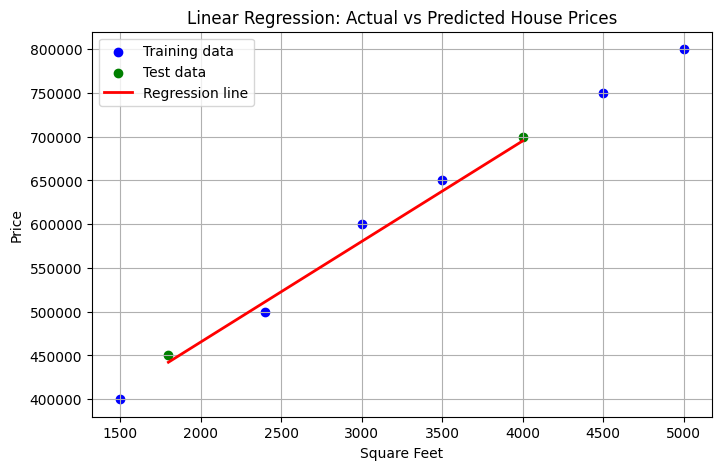

Intercept (β₀): 235298.73
Slope (β₁): 114.99


In [34]:
# Sort test data for smooth line plot
sorted_indices = X_test.argsort()
X_test_sorted = X_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")